In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info
Combines multiple Pyha cores to calculate a spectrogram with average pooling feature. See individual components for more info.

# Examples

## Low power signal

262144
262144


INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 262144/262144 [04:12<00:00, 1037.54it/s]

INFO:sim:Flushing the pipeline to collect 8192 valid samples (currently have 7680)


INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


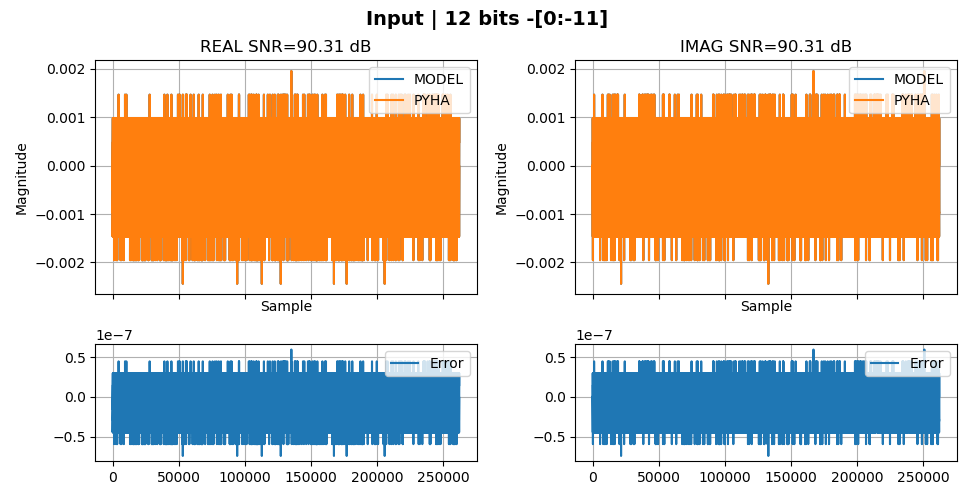

<IPython.core.display.Javascript object>


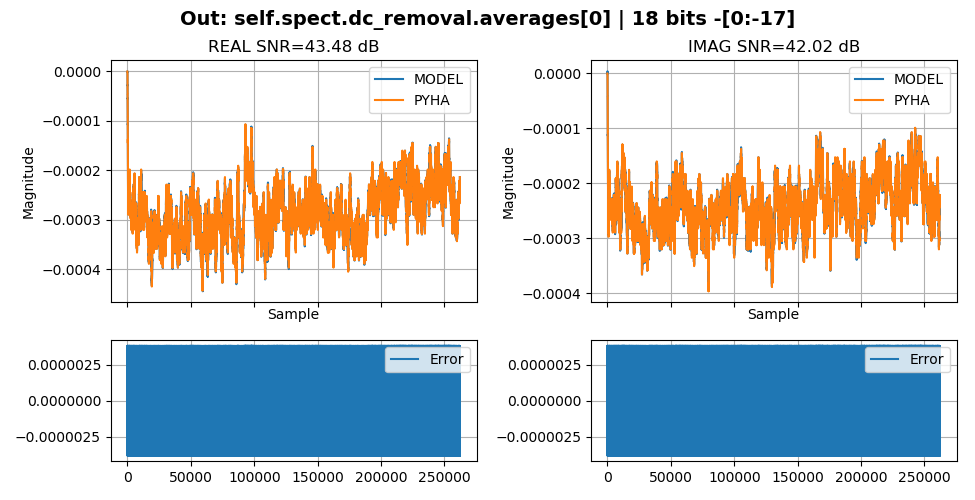

<IPython.core.display.Javascript object>


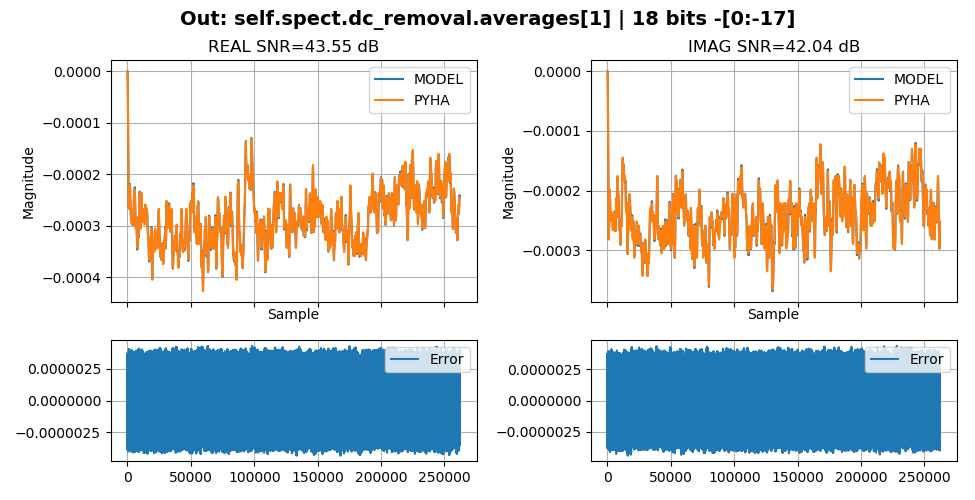

<IPython.core.display.Javascript object>


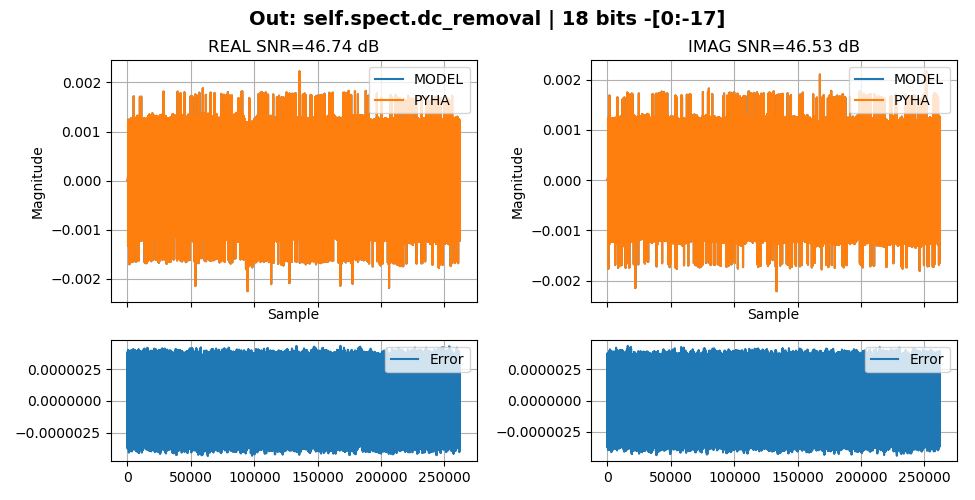

<IPython.core.display.Javascript object>


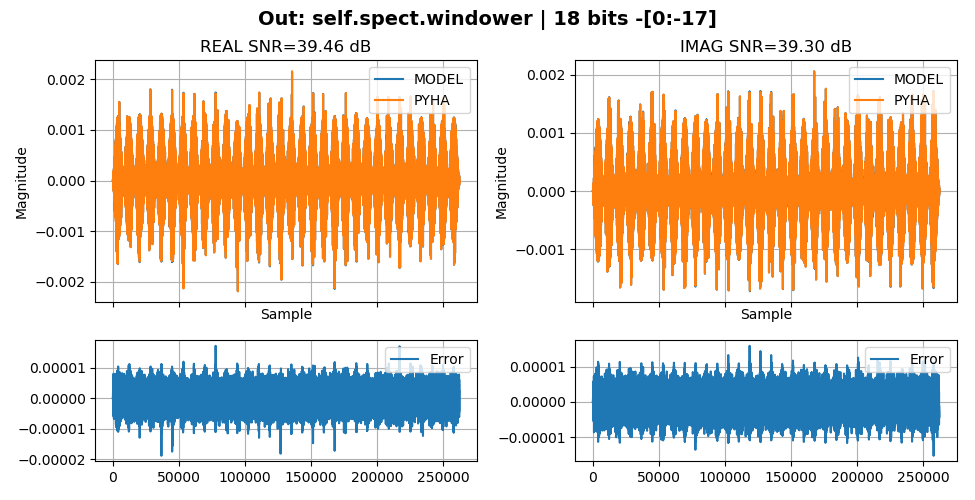

<IPython.core.display.Javascript object>


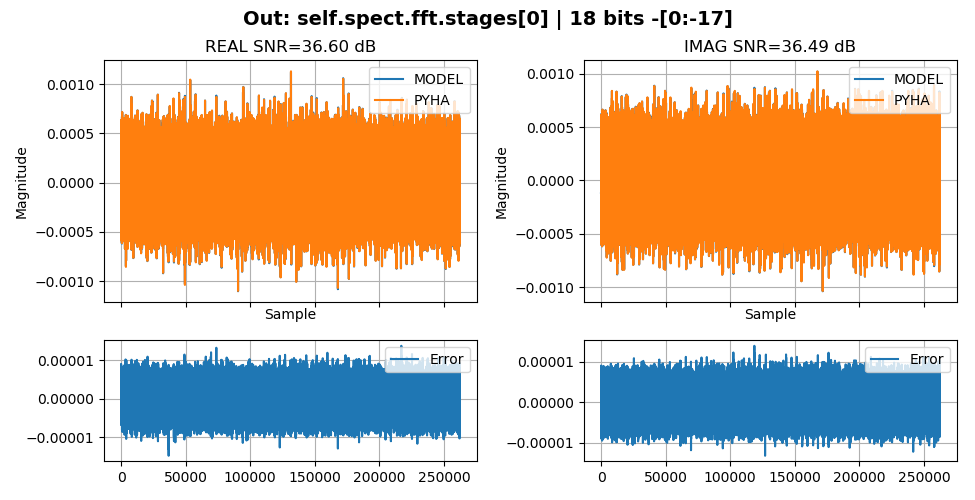

<IPython.core.display.Javascript object>


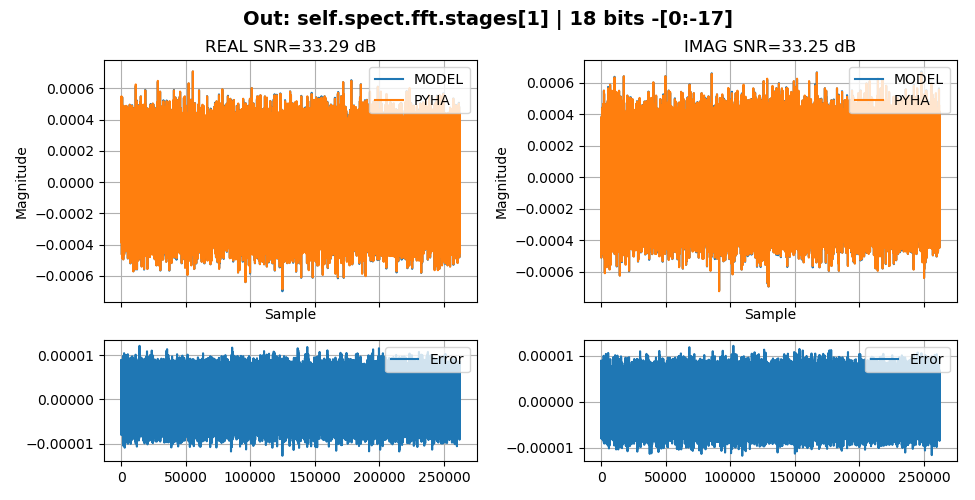

<IPython.core.display.Javascript object>


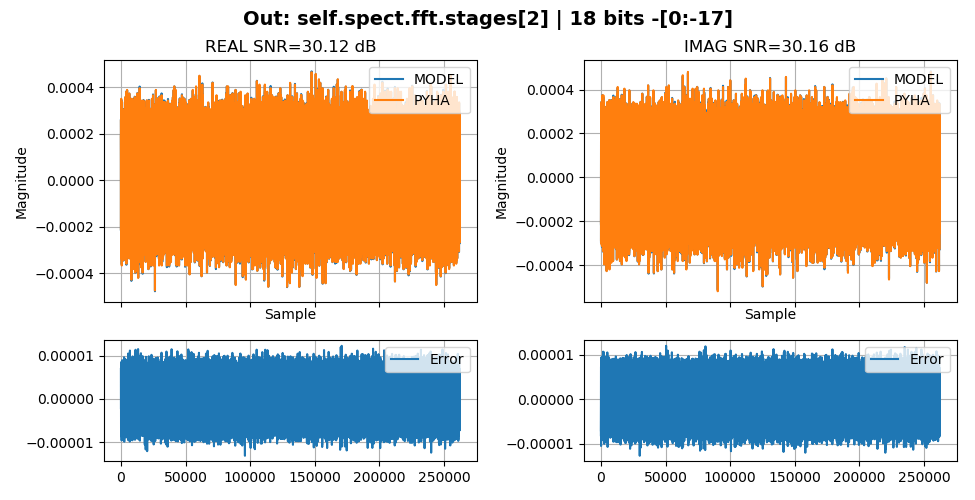

<IPython.core.display.Javascript object>


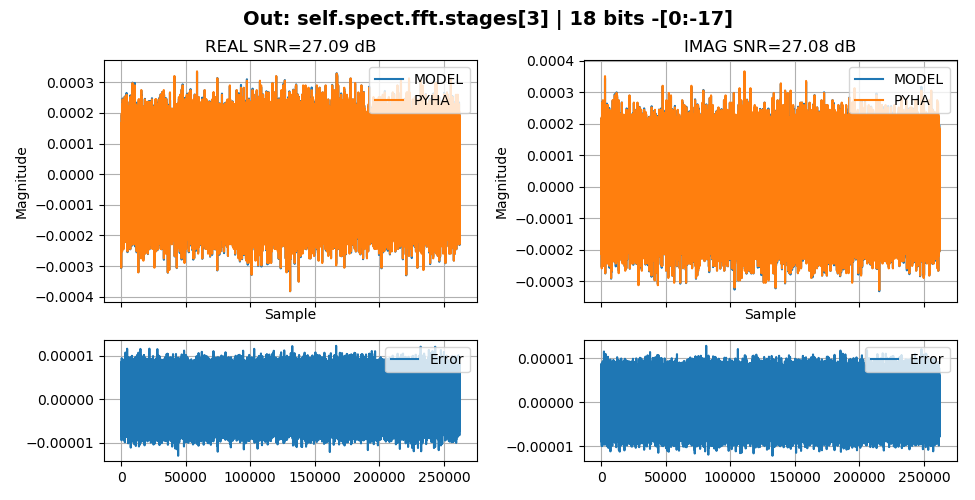

<IPython.core.display.Javascript object>


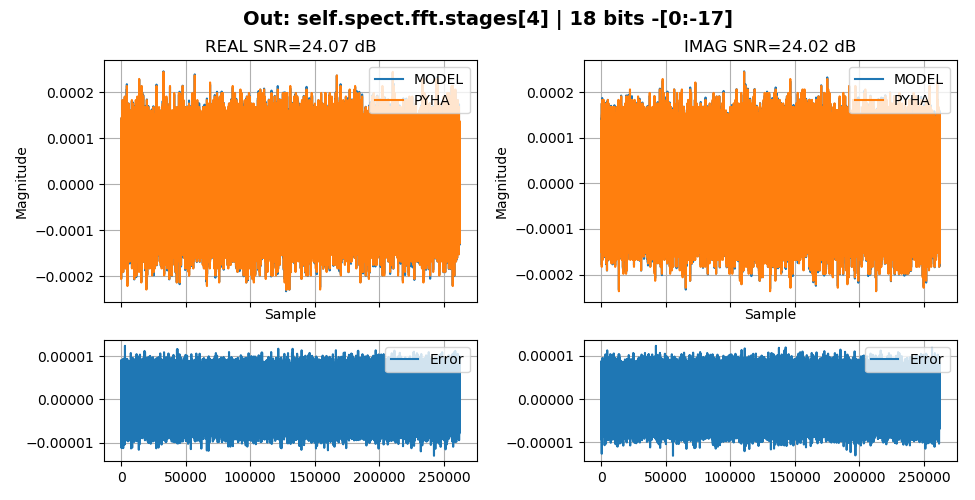

<IPython.core.display.Javascript object>


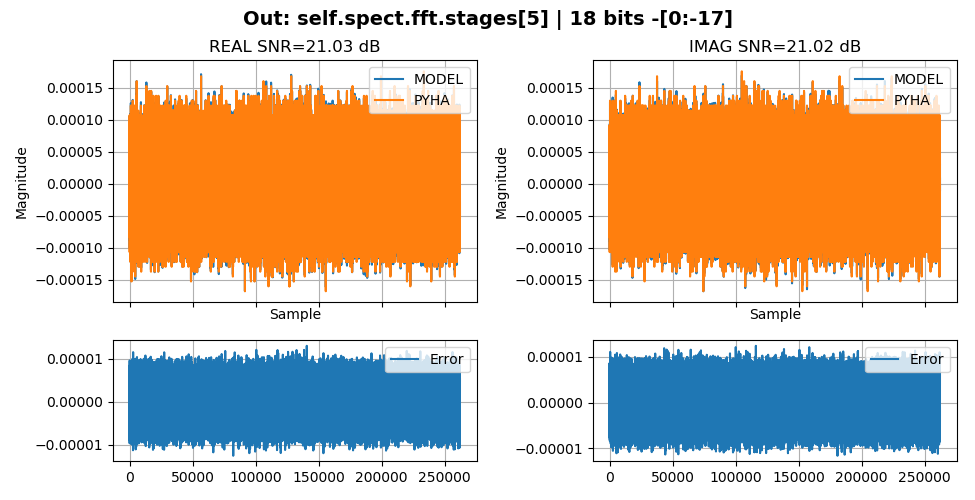

<IPython.core.display.Javascript object>


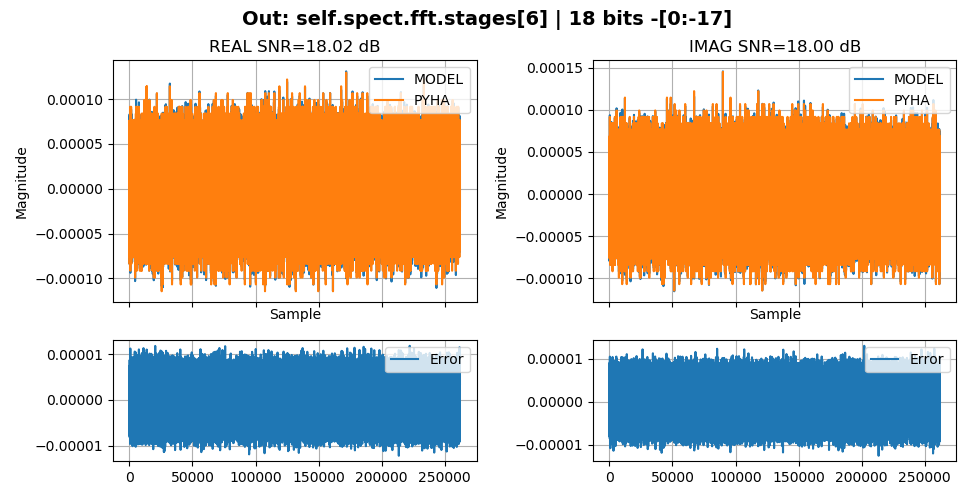

<IPython.core.display.Javascript object>


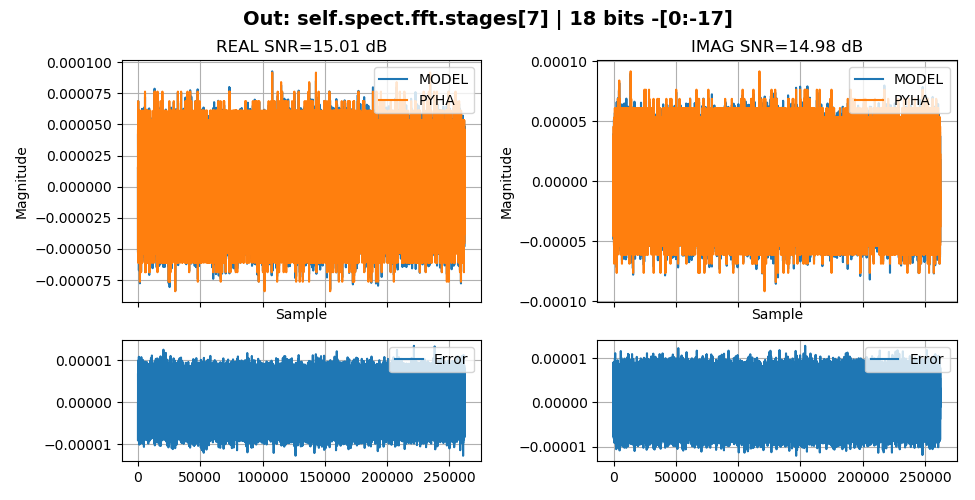

<IPython.core.display.Javascript object>


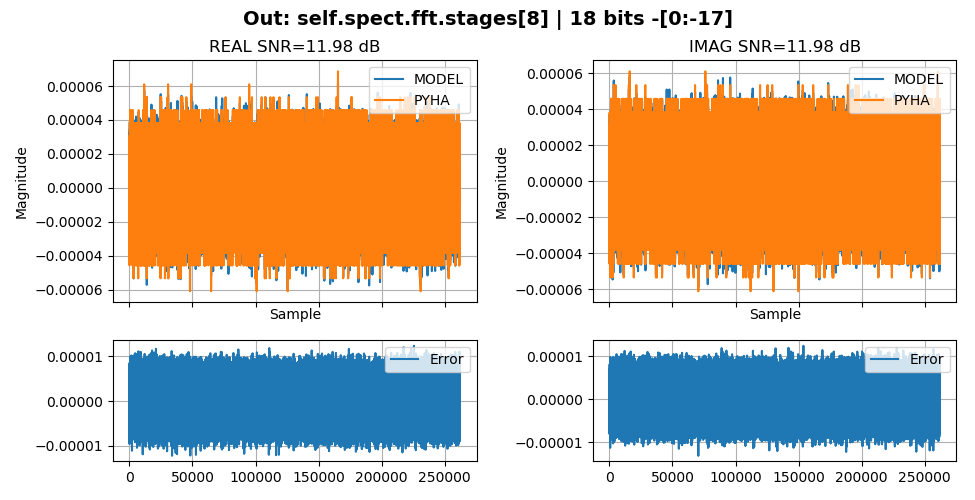

<IPython.core.display.Javascript object>


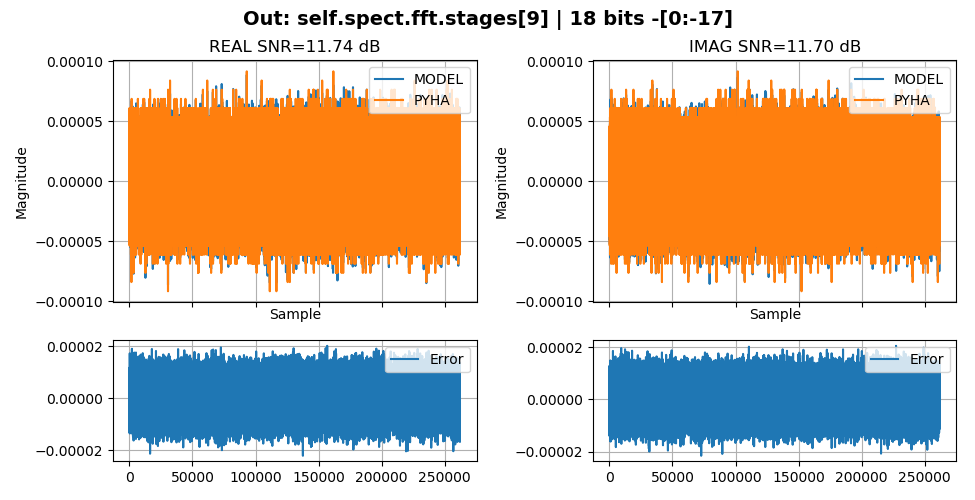

<IPython.core.display.Javascript object>


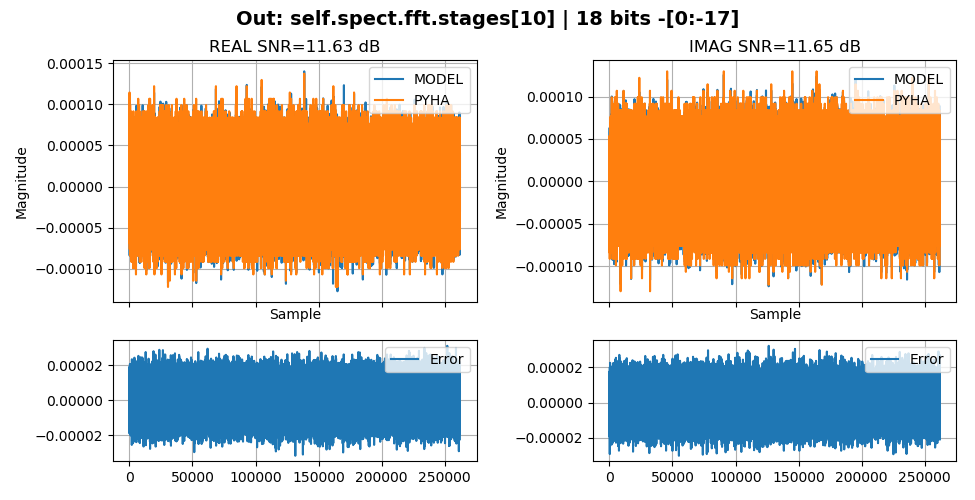

<IPython.core.display.Javascript object>


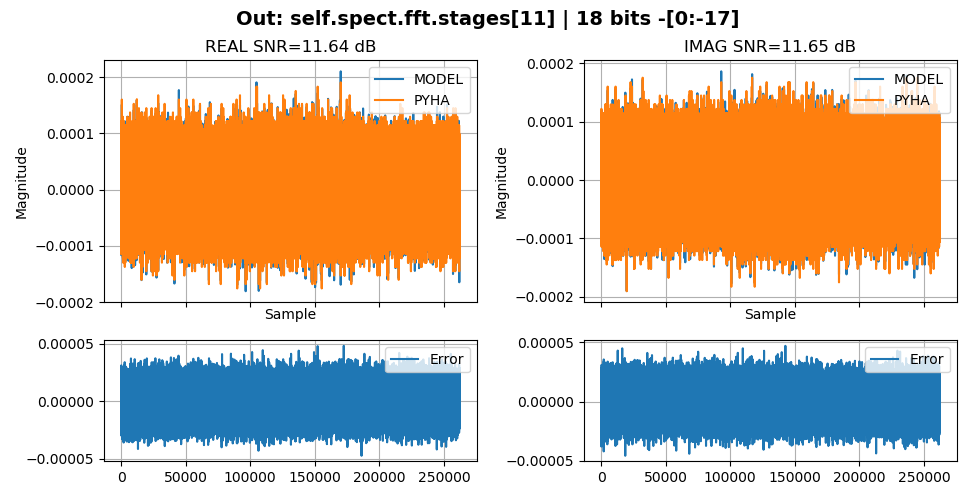

<IPython.core.display.Javascript object>


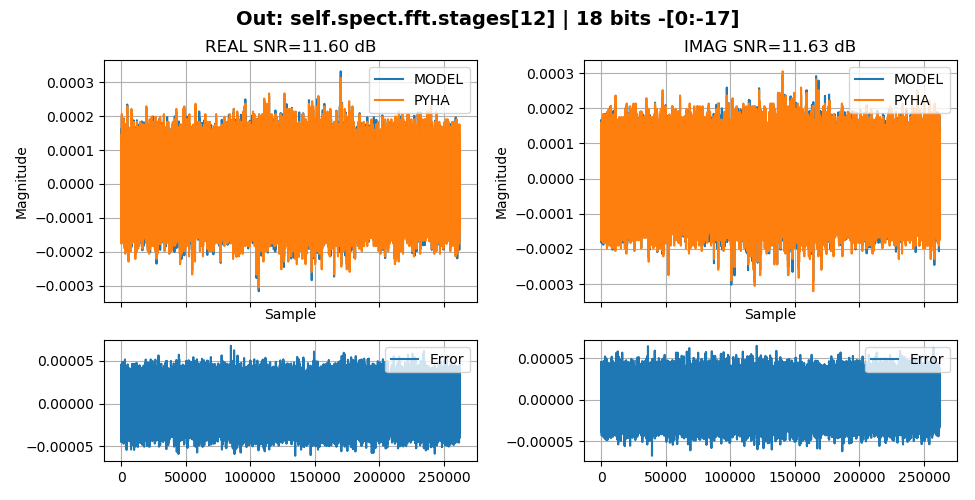

<IPython.core.display.Javascript object>


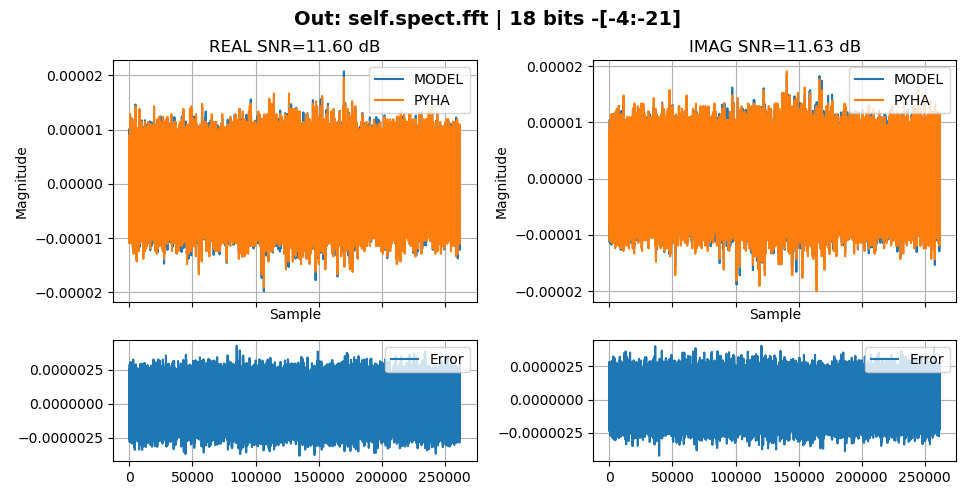

<IPython.core.display.Javascript object>


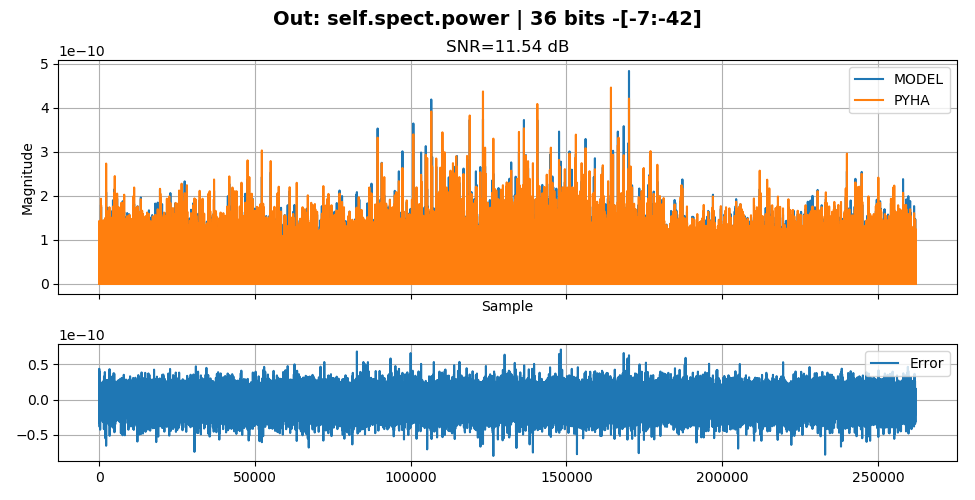

<IPython.core.display.Javascript object>


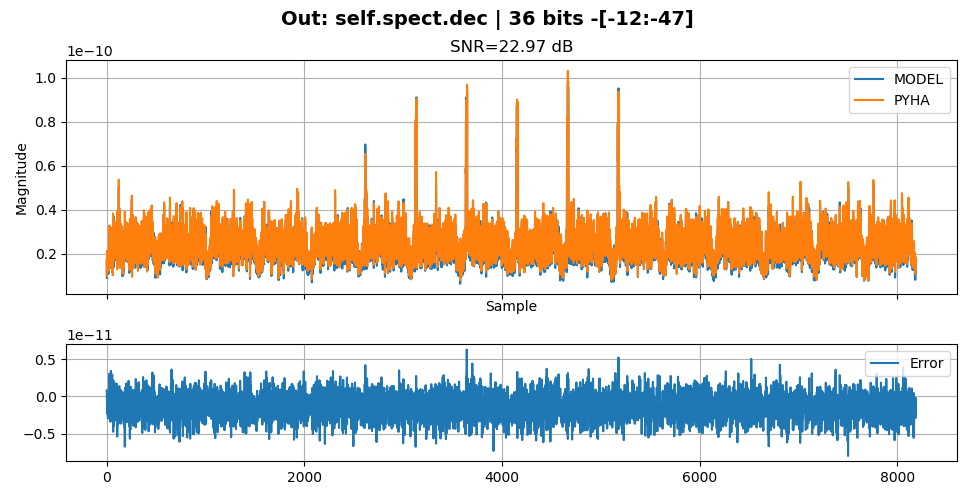

<IPython.core.display.Javascript object>


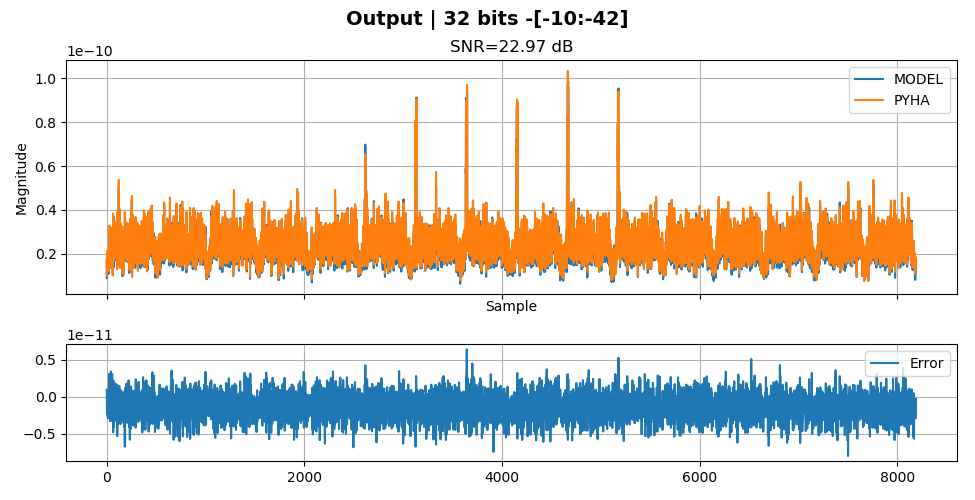

In [2]:
l = 1024*8 * 2
input_signal = load_complex64_file('/home/gaspar/Documents/limem_ph3weak_40m')
print(len(input_signal))
input_signal = input_signal[:len(input_signal) // (l) * (l)]
print(len(input_signal))

from pyha.applications.spectrogram_limesdr.spectrogram_limesdr import SpectrogramLimeSDR
dut = SpectrogramLimeSDR()

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()

<IPython.core.display.Javascript object>


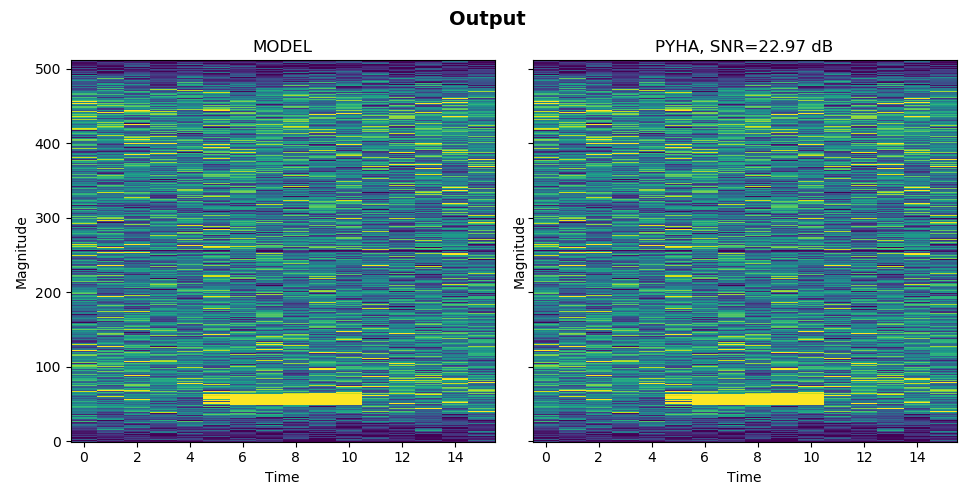

In [3]:
from pyha.simulation.plotter import imshow
imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

## High power signal

INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 294912/294912 [04:52<00:00, 1008.24it/s]


INFO:sim:Flushing the pipeline to collect 9216 valid samples (currently have 8704)
INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:sim:Simulations completed!


<IPython.core.display.Javascript object>


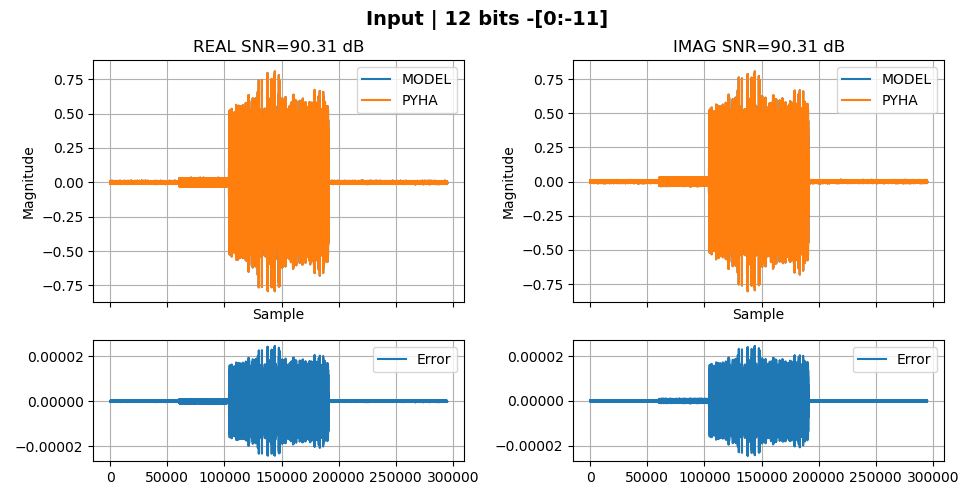

<IPython.core.display.Javascript object>


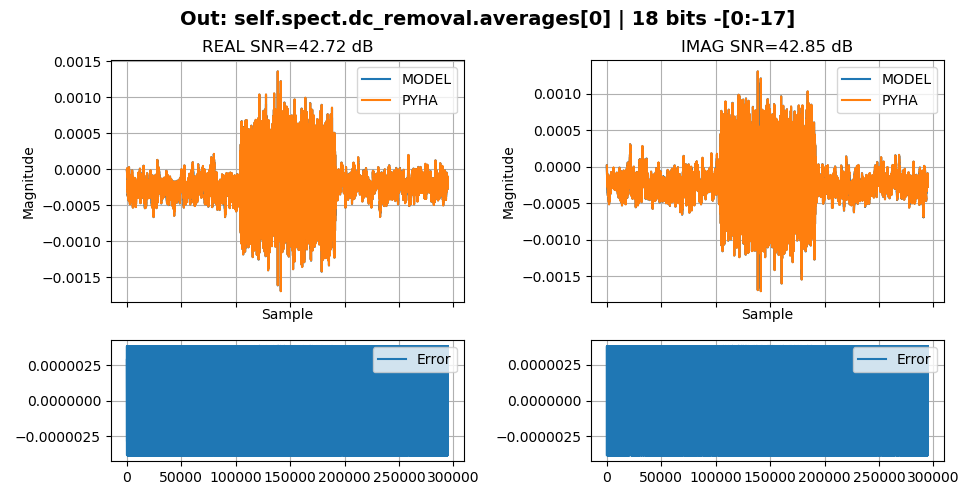

<IPython.core.display.Javascript object>


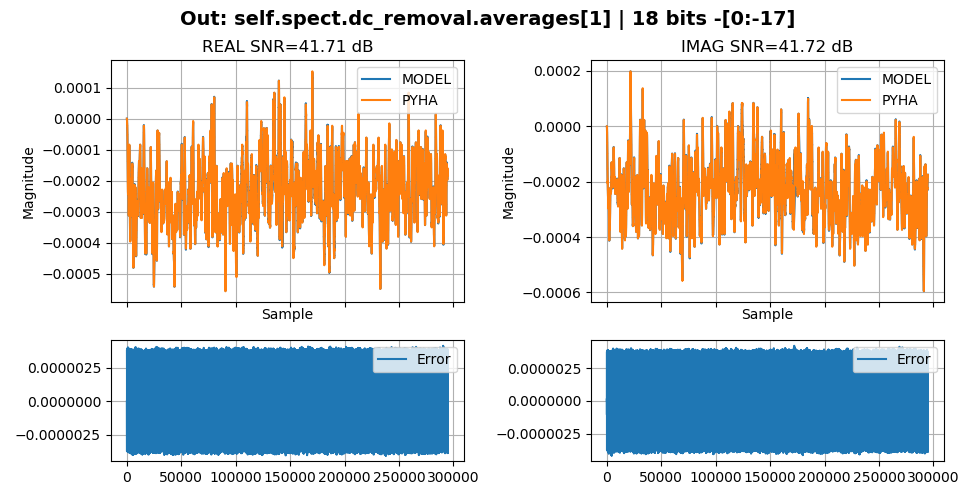

<IPython.core.display.Javascript object>


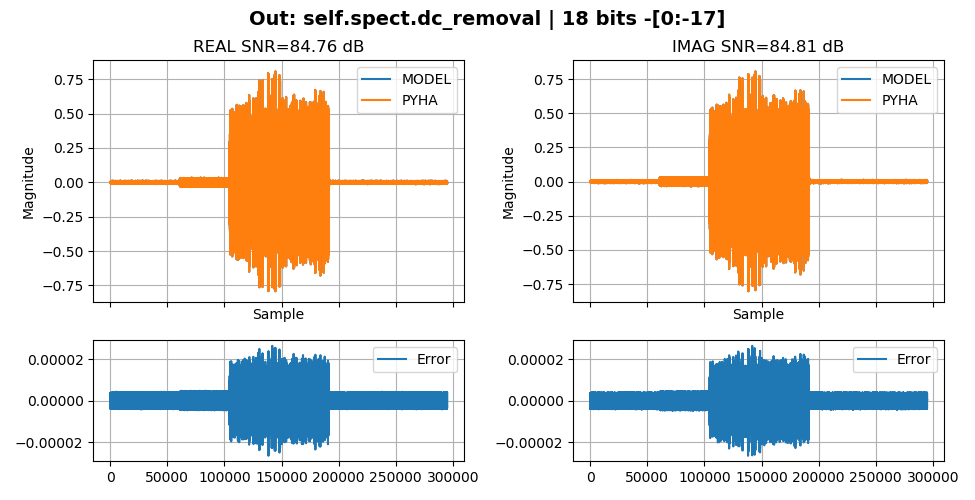

<IPython.core.display.Javascript object>


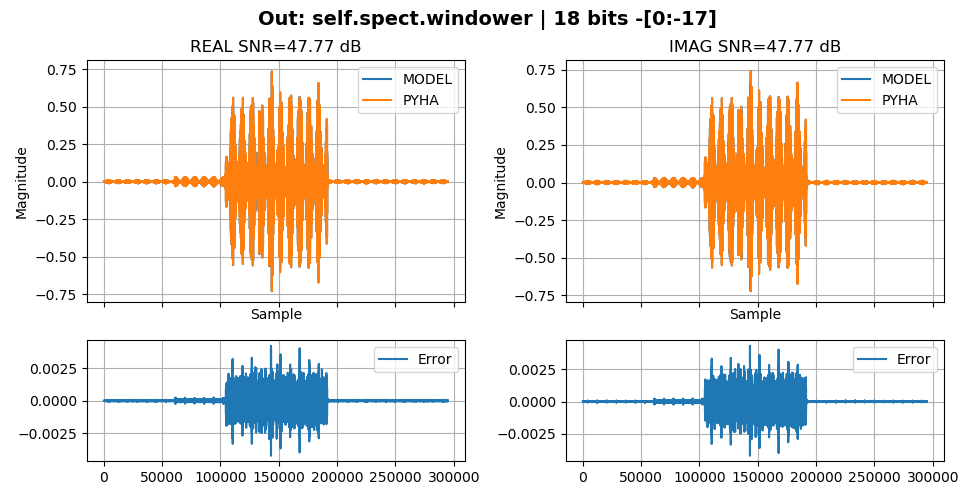

<IPython.core.display.Javascript object>


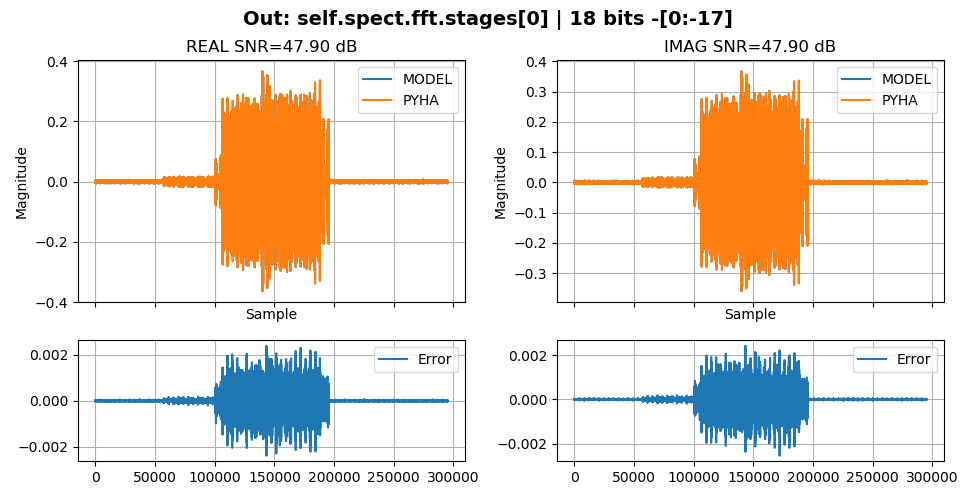

<IPython.core.display.Javascript object>


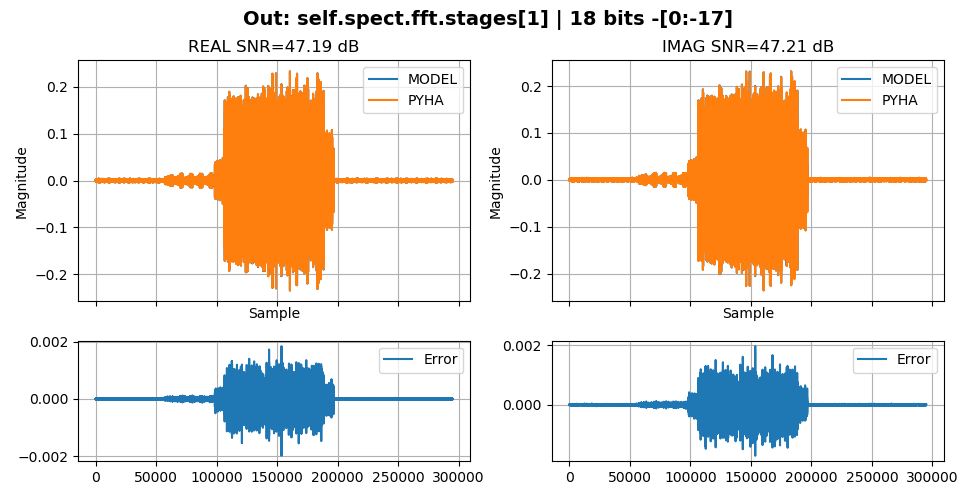

<IPython.core.display.Javascript object>


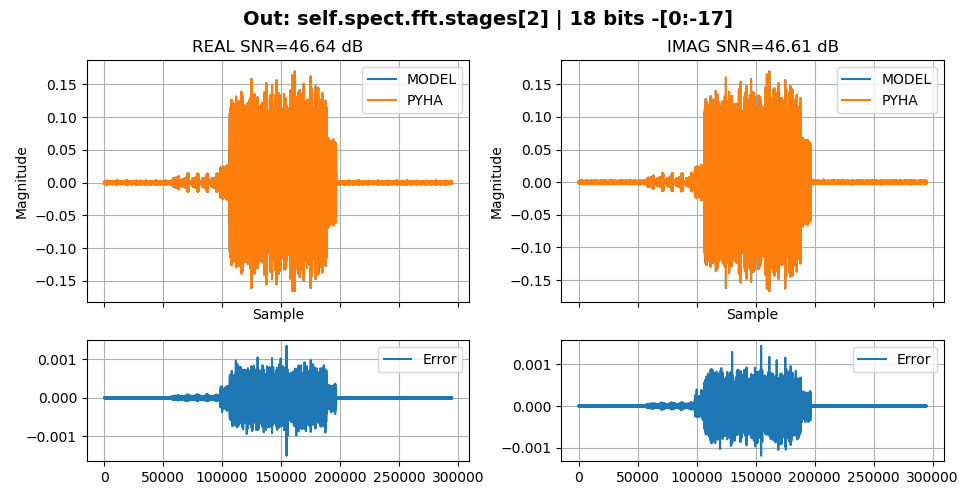

<IPython.core.display.Javascript object>


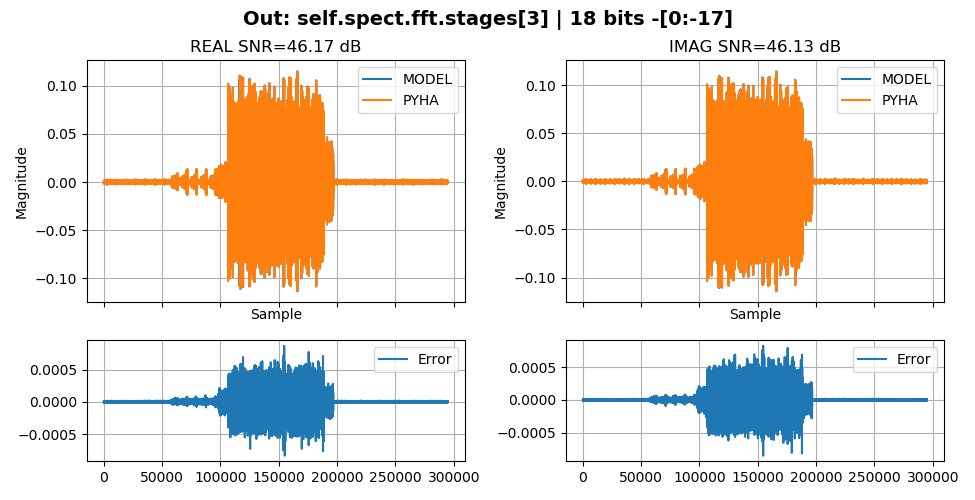

<IPython.core.display.Javascript object>


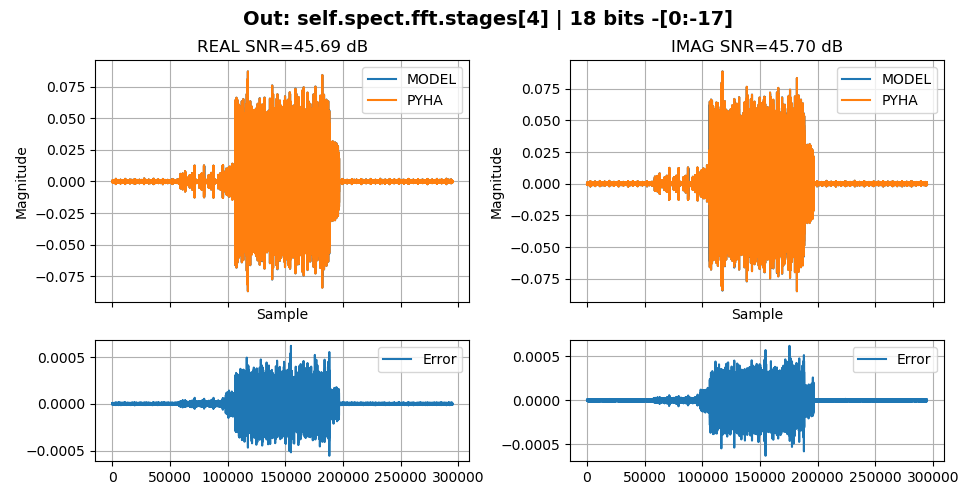

<IPython.core.display.Javascript object>


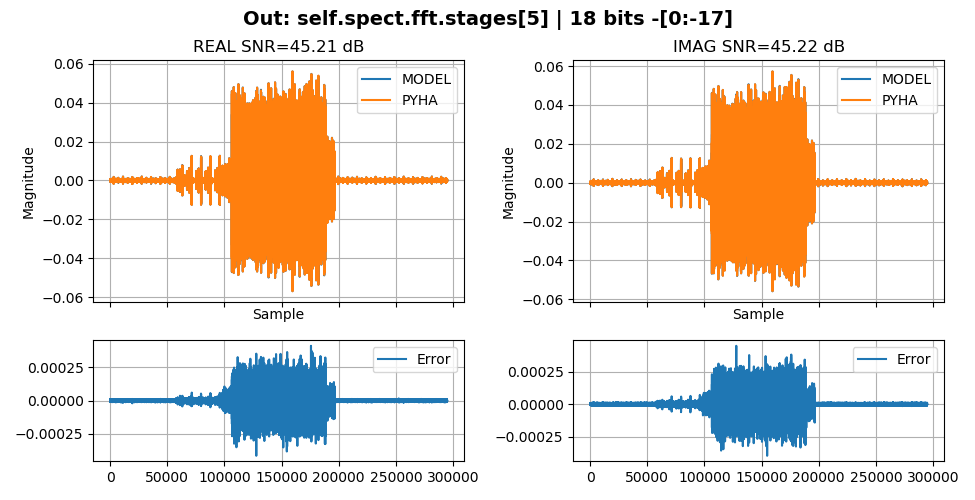

<IPython.core.display.Javascript object>


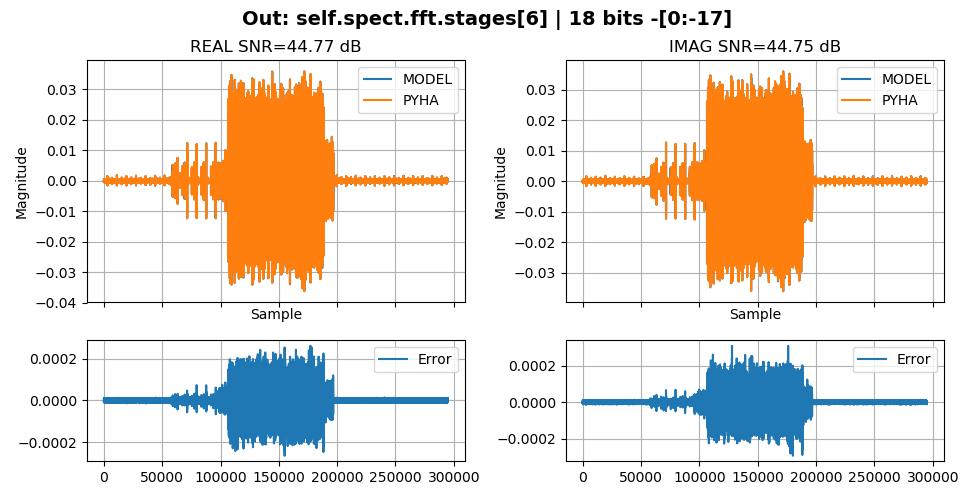

<IPython.core.display.Javascript object>


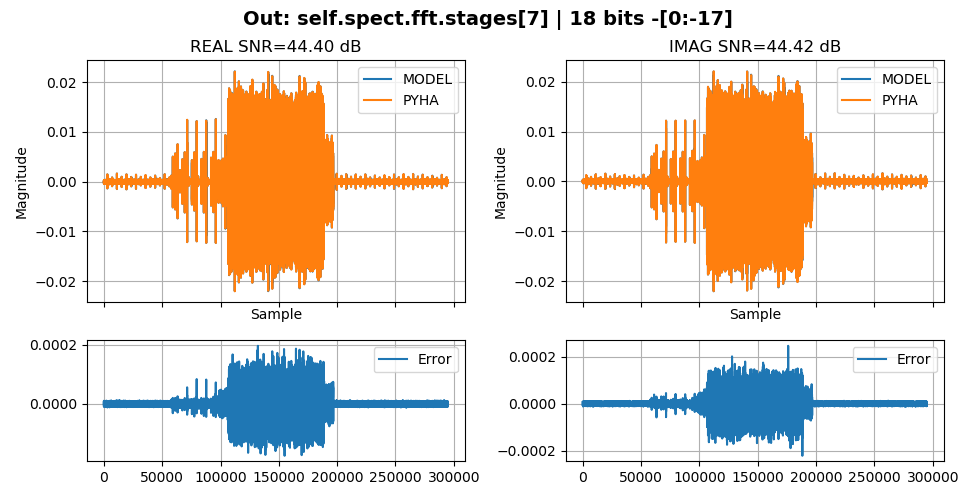

<IPython.core.display.Javascript object>


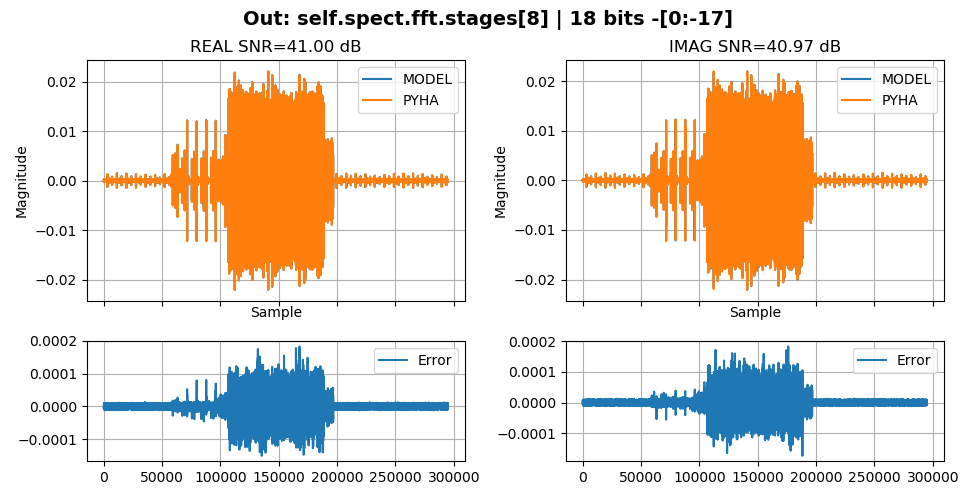

<IPython.core.display.Javascript object>


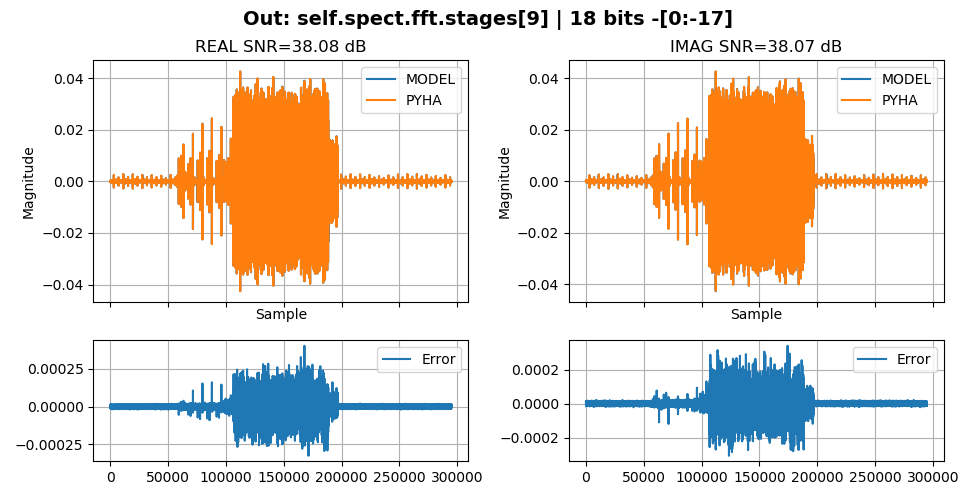

<IPython.core.display.Javascript object>


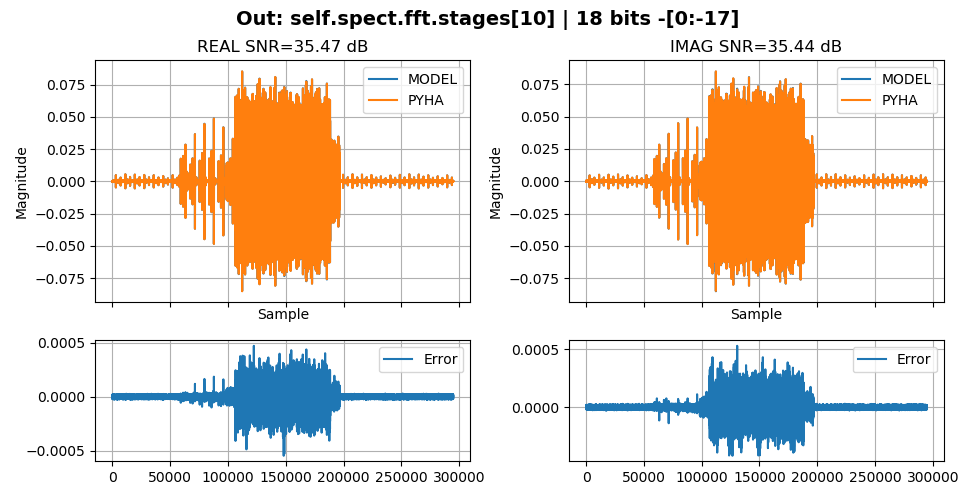

<IPython.core.display.Javascript object>


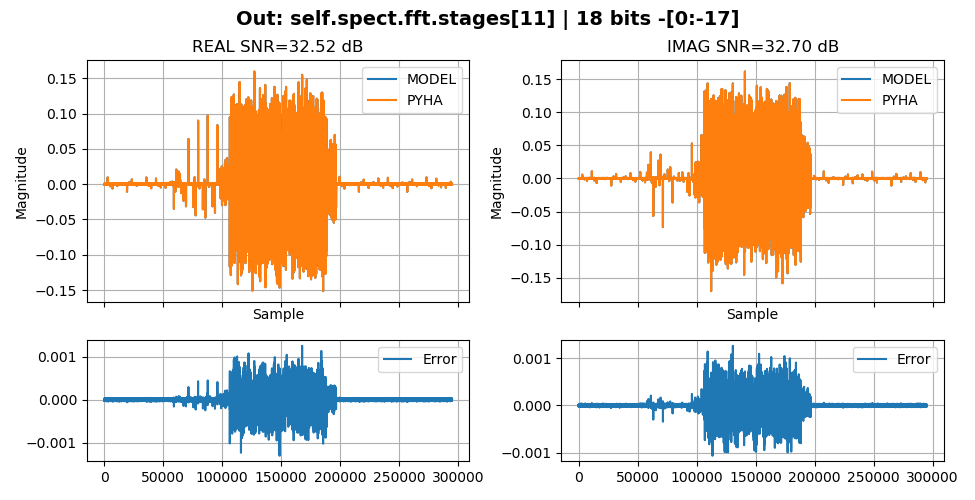

<IPython.core.display.Javascript object>


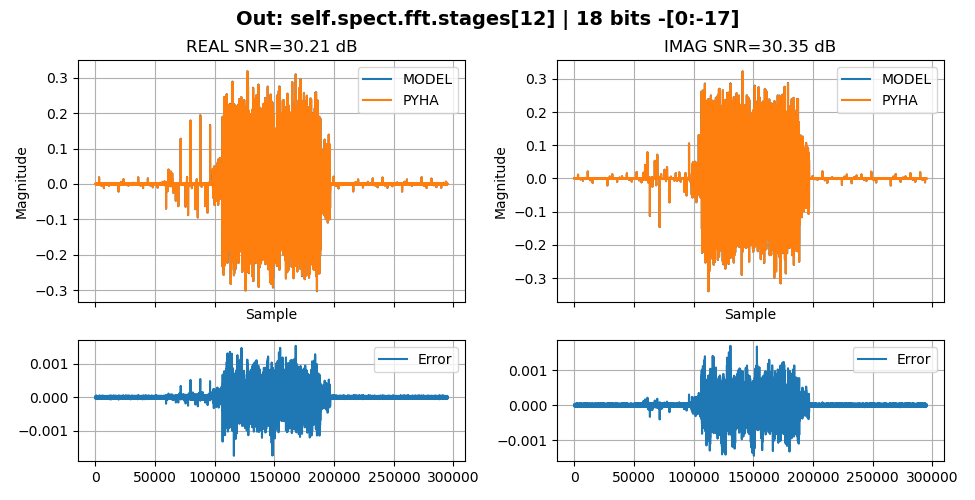

<IPython.core.display.Javascript object>


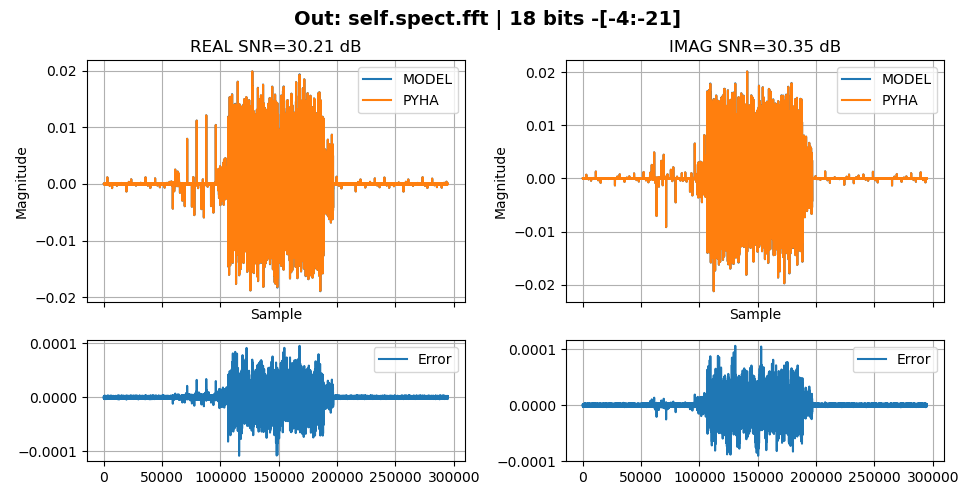

<IPython.core.display.Javascript object>


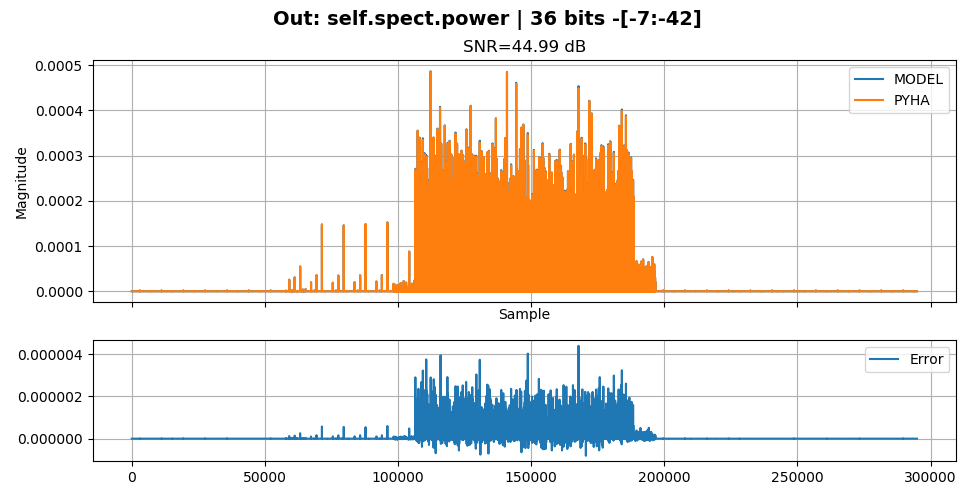

<IPython.core.display.Javascript object>


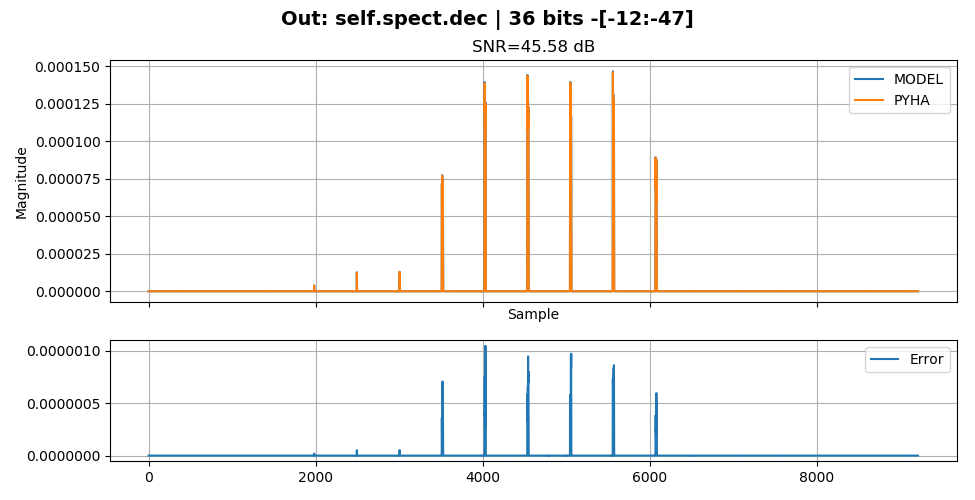

<IPython.core.display.Javascript object>


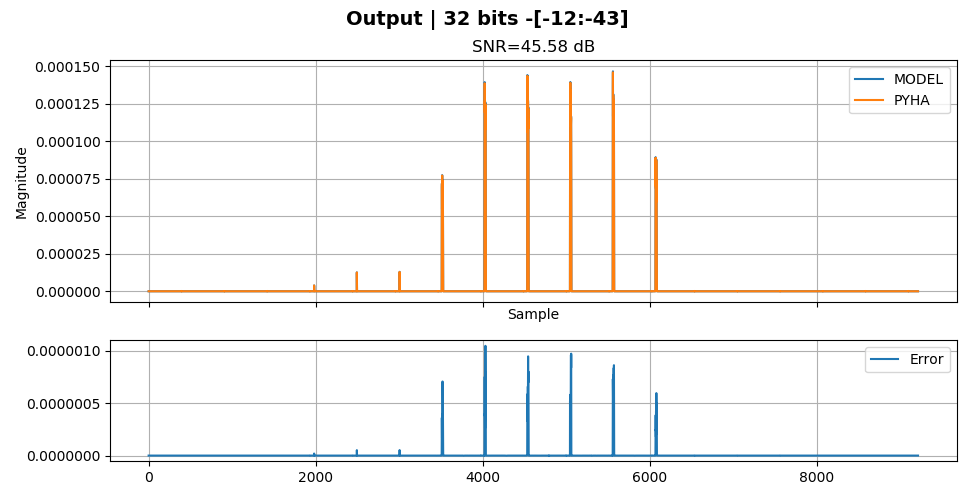

In [9]:
from pyha.applications.spectrogram_limesdr.spectrogram_limesdr import SpectrogramLimeSDR
dut = SpectrogramLimeSDR()

crop = dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS
# input_signal = load_complex64_file('/home/gaspar/Documents/limem_ph3strong_40m')
input_signal = load_complex64_file('/home/gaspar/Documents/tester')
input_signal = input_signal[:len(input_signal) // (crop) * (crop)]

sims = simulate(dut, input_signal, trace=True, pipeline_flush='auto')
plot_trace()

<IPython.core.display.Javascript object>


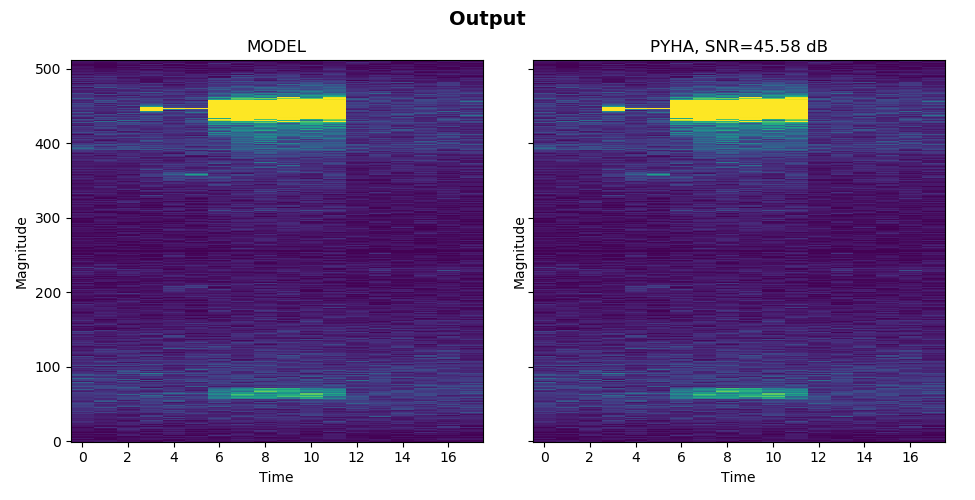

In [10]:
from pyha.simulation.plotter import imshow
imshow(sims, name='Output', rows=dut.spect.FFT_SIZE // dut.spect.AVG_FREQ_AXIS, transpose=True)

# Conversion to VHDL and RTL/NETLIST simulations

In [ ]:
# Pyha design can be converted to VHDL after the PYHA simulation has been ran
# VHDL sources can be used to run the RTL simulation, in addition NETLIST simulation is supported (after Quartus mapper)
# Pyha automatically manages everything needed if you specify the 'RTL', 'NETLIST' flags.
output_dir = '~/Documents/pyha_output'
dut = SpectrogramLimeSDR()
minimal_input = input_signal[:dut.spect.FFT_SIZE * dut.spect.AVG_TIME_AXIS]
sims = simulate(dut, minimal_input, pipeline_flush='auto', simulations=['MODEL', 'PYHA', 'RTL', 'GATE'])

INFO:sim:Simulaton needs to support conversion to VHDL -> major slowdown
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Running "PYHA" simulation...


100%|██████████| 16384/16384 [01:07<00:00, 243.94it/s]

INFO:sim:Flushing the pipeline to collect 512 valid samples (currently have 0)


INFO:sim:Flush took 8753 cycles.
INFO:sim:OK!
INFO:conversion:Creating top.vhd ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:DataValid to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:MovingAverage to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DCRemoval to VHDL ...
INFO:conversion:Windower to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
INFO:conversion:ShiftRegister to VHDL ...
INFO:conversion:DownCounter to VHDL ...
INFO:conversion:StageR2SDF to VHDL ...
I

# Synthesis:  resource usage and Fmax

In [ ]:
print(vhdl_sim.quartus.get_resource_usage('fit'))
print(vhdl_sim.quartus.get_fmax())

In [ ]:
# 1024 dut = Spectrogram(fft_size, avg_freq_axis=16, avg_time_axis=1, fft_twiddle_bits=9, window_bits=8)
# INFO:sim:Total logic elements : 5,117
# INFO:sim:    Total combinational functions : 4,820
# INFO:sim:    Dedicated logic registers : 2,514
# INFO:sim:Total registers : 2514
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 59,004
# INFO:sim:Embedded Multiplier 9-bit elements : 80

# dut = Spectrogram(fft_size, avg_freq_axis=8, avg_time_axis=1, fft_twiddle_bits=9, window_bits=8)
# INFO:sim:Family : Cyclone IV E
# INFO:sim:Total logic elements : 5,125
# INFO:sim:    Total combinational functions : 4,829
# INFO:sim:    Dedicated logic registers : 2,519
# INFO:sim:Total registers : 2519
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 63,612
# INFO:sim:Embedded Multiplier 9-bit elements : 80

In [ ]:
# INFO:sim:Family : Cyclone IV E
# INFO:sim:Total logic elements : 10,821
# INFO:sim:    Total combinational functions : 10,527
# INFO:sim:    Dedicated logic registers : 3,171
# INFO:sim:Total registers : 3171
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 607,140
# INFO:sim:Embedded Multiplier 9-bit elements : 104